### Import Libraries

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
X,y=make_moons()

In [3]:
X.shape,y.shape

((100, 2), (100,))

In [4]:
moon=pd.DataFrame(X,columns=['X1','X2'])

In [5]:
moon['y']=y

In [6]:
moon.head()

,X1,X2,y
0,0.327699,-0.240278,1
1,0.000000,0.500000,1
2,0.654635,-0.438468,1
3,0.761446,0.648228,0
4,0.481607,-0.355143,1


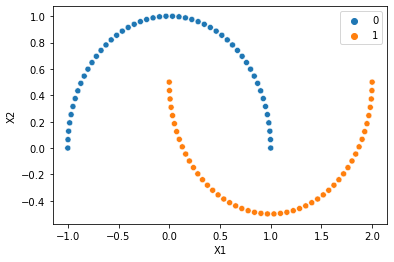

In [7]:
sns.scatterplot(moon['X1'],moon['X2'],hue=y)
plt.show()

In [8]:
mms=MinMaxScaler()
scaled_X=mms.fit_transform(X)

### Using Hierarchical method

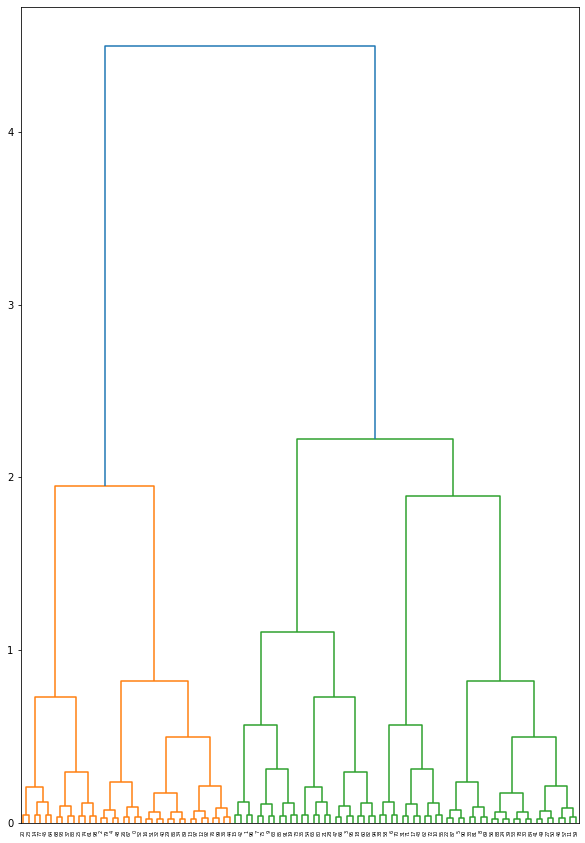

In [9]:
plt.figure(figsize=(10,15))
sch.dendrogram(sch.linkage(y=scaled_X, method='ward', metric='euclidean',),orientation='top',show_leaf_counts=True,distance_sort='decending')
plt.show()

In [10]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [11]:
label_hierarchy=cluster.fit_predict(scaled_X)

In [12]:
moon['label_hierarchy']=label_hierarchy

In [13]:
moon.head()

,X1,X2,y,label_hierarchy
0,0.327699,-0.240278,1,1
1,0.000000,0.500000,1,0
2,0.654635,-0.438468,1,1
3,0.761446,0.648228,0,0
4,0.481607,-0.355143,1,1


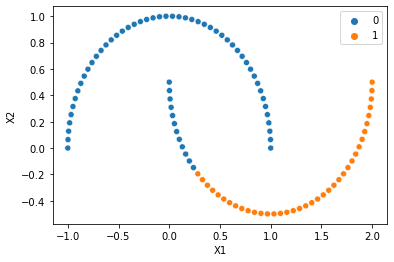

In [14]:
sns.scatterplot(moon['X1'],moon['X2'],hue=label_hierarchy)
plt.show()

### Using Kmeans method

In [15]:
kmeans_moon=KMeans(n_clusters=2,algorithm='auto',max_iter=600)

In [16]:
labels_kmeans=kmeans_moon.fit_predict(scaled_X)

In [17]:
moon['labels_kmeans']=labels_kmeans

In [18]:
moon.head()

,X1,X2,y,label_hierarchy,labels_kmeans
0,0.327699,-0.240278,1,1,1
1,0.000000,0.500000,1,0,0
2,0.654635,-0.438468,1,1,1
3,0.761446,0.648228,0,0,0
4,0.481607,-0.355143,1,1,1


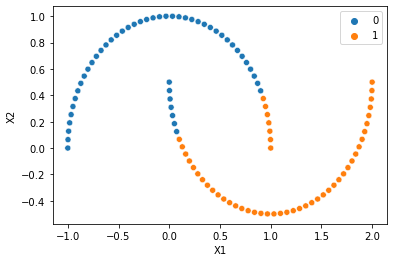

In [19]:
sns.scatterplot(moon['X1'],moon['X2'],hue=labels_kmeans)
plt.show()

### Using DBSCAN Method

In [20]:
dbs=DBSCAN(eps=0.2,metric='euclidean',min_samples=2)

In [21]:
label_dbs=dbs.fit_predict(scaled_X)

In [22]:
moon['label_dbs']=label_dbs

In [23]:
moon.head()

,X1,X2,y,label_hierarchy,labels_kmeans,label_dbs
0,0.327699,-0.240278,1,1,1,0
1,0.000000,0.500000,1,0,0,0
2,0.654635,-0.438468,1,1,1,0
3,0.761446,0.648228,0,0,0,1
4,0.481607,-0.355143,1,1,1,0


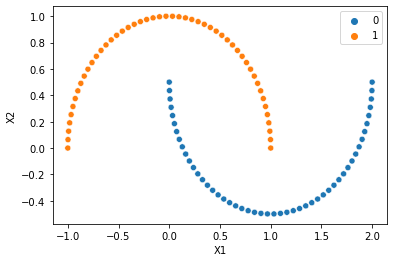

In [24]:
sns.scatterplot(moon['X1'],moon['X2'],hue=label_dbs)
plt.show()

### End